## Sieć neuronowa funkcji XOR

W ramach listy 3 (zadanie B)  należało zaimplementować siec neuronową realizującą funkcję dwuargumentową XOR oraz dobrać odpowiednią
strukturę sieci, funkcje aktywacji neuronów, metodę uczenia. Dodatkowo należało przedstawić na wykresie etapy uczenia
sieci oraz jej działanie i zbadać symulacyjnie wpływ wartości współczynnika uczenia na działanie sieci. Następnie wyciągnąć wnioski.

### 1. Struktura sieci

Sieć neuronowa dla funkcji XOR na wejściu przyjmuje argumenty x1 i x2, dla których znane jest wyjście y, o następującej postaci:  

|x1 |x2 | y |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

Struktura sieci neuronowej realizującej funkcję XOR będzie składała się 3 warstw: wejściowej, ukrytej i wyjściowej. Liczba neuronów w każdej warstwie to:
- warstwa wejściowa - 2 neurony
- warstwa ukryta - 2 neurony
- warstwa wyjściowa - 1 neuron

Po ustaleniu ilości neronów w każdej z warstw, można ustalić dla sieci macierz wag warstwy ukrytej oraz wyjściowej o rozmiarze odpowiednio 2x2 oraz 2x1. Bias warstwy ukrytej będzie miał zatem rozmiar 1x2, a dla warstwy wyjściowej będzie to 1x1. Wartości wag i biasów na początek są losowane za pomocą funkcji random.uniform()


In [27]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([[0,0],[0,1],[1,0],[1,1]]) # macierz wejść - x1 x2
y = np.array([[0],[1],[1],[0]]) # wyjscie y

n_x = 2 #liczba neuronow warstwy wejsciowej
n_h = 2 #liczba neuronow warstwy ukrytej
n_y = 1 #liczba neuronow warstwy wyjsciowej

np.random.seed(1)
wh = np.random.uniform(size = (n_x,n_h)) # 2x2 macierz wag dla warstwy ukrytej
wy = np.random.uniform(size = (n_h,n_y)) # 2x1 macierz wag dla warstwy wyjsciowej

b_h = np.random.uniform(size = (1,n_h)) # 1x2 macierz biasow dla warstwy ukrytej
b_y = np.random.uniform(size = (1,n_y)) # 1x1 macierz biasow dla warstwy wyjsciowej


### 2. Funkcja aktywacji

Przy wyborze funkcji aktywacji należy brać pod uwagę rodzaj problemu, jaki sieć ma rozwiązać. 
Wykorzystanie skokowych funkcji aktywacji ogranicza możliwości neuronów. Z kolei nieliniowe funkcje
aktywacji (np.funkcja sigmoidalna, funkcja tangensa hiperbolicznego), które są różniczkowalne, pozwalają na zastosowanie metod gradientowych do treningu neuronów. Ich użycie umożliwia budowanie wielowarstwowych sieci neuronowych (np. MLP) i dostosowanie takich sieci do bardziej złożonych (nieliniowych) zadań obliczeniowych.

Zatem do tworzonej sieci neuronowej realizującej funkcję XOR, wybrana została nieliniowa ciągła **funkcja sigmoidalna**, która na wyjściu daje wartości od 0 do 1. Funkcja sigmoidalna przyjmuje postać:

$$ f_ \ (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^  {-\alpha x} }  $$ 
gdzie  ${\alpha}$ - to wspołczynnik uczenia


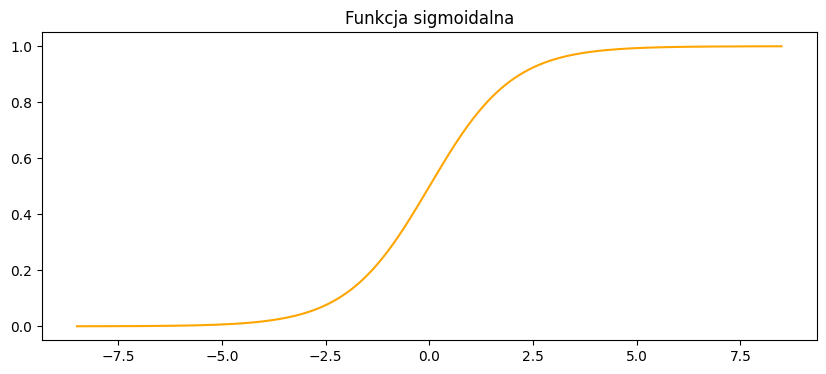

In [28]:
def f_sigmoid(x):
    return 1/(1+np.exp(-x))

plt.figure(figsize=(10, 4))
plt.plot(np.arange(-8.5,8.5,0.01),f_sigmoid(np.arange(-8.5,8.5,0.01)), color='orange')
plt.title('Funkcja sigmoidalna')
plt.show()

### 3. Metoda uczenia - propagacja wsteczna  
Uczenie sieci neuronowej odbywa się poprzez aktualizacje wag zgodnie z **algorytmem wstecznej propagacji**, który pomaga jej osiągnąć oczekiwaną wartość wyjściową. Obejmuje on dwie główne fazy:
1. Faza propagacji wejść. W tej fazie neurony sumują ważone sygnały wejściowe dochodzące z neuronów w poprzedniej warstwy.
2. Faza propagacji błędu. W tej fazie neurony sumują ważone błędy pobrane z neuronów w następnej warstwy.  
Kolejno następuje aktualizacja wag.

**Algorytm wstecznej propagacji:**    
**KROK 1:** Losowe przypisz wagi i biasy   
**KROK 2:** Iteruj po danych:    
i) oblicz przewidywany wynik za pomocą funkcji aktywacji (propagacja wejść)  
ii) oblicz stratę za pomocą kwadratowego błędu strat  (propagacja błedu)  
iii) zaktualizuj wagi  
**KROK 3:** Powtarzaj do osiągnięcia minimalnego średniego błędu kwadratowego lub do momentu osiągniecia maksymalnej
liczby cykli uczących.

In [29]:
def back_propagation(x,y,wh,wy,b_h,b_y,alpha):
           
# część I - propagacja wejsc (do przodu)
    #dla warstwy ukrytej
    zh = np.dot(x,wh)
    zh += b_h
    ah = f_sigmoid(zh) 

    #dla warstwy wyjsciowej
    zy = np.dot(ah, wy)
    zy += b_y
    ay = f_sigmoid(zy)

    # funkcja straty
    loss = np.mean(np.square(y-ay))
    
    # precyzja
    accuracy = np.mean(np.round(ay)==y)
    
#część II - propagacja błędu (wsteczna)

    #dla warstwy wyjsciowej
    error = y-ay
    d_zy = error * ay*(1-ay)
    
    #dla warstwy ukrytej
    error_h = d_zy.dot(wy.T)
    d_zh = error_h * ah*(1-ah)

#część III- aktualizacja wag i biasów
    wy += ah.T.dot(d_zy) * alpha
    b_y += np.sum(d_zy,axis=0,keepdims=True) * alpha
    wh += x.T.dot(d_zh) * alpha
    b_h += np.sum(d_zh,axis=0,keepdims=True) * alpha
    
    return wh,wy,b_h,b_y,loss,accuracy

### 4. Etapy uczenia sieci i jej działanie

Epoka:  0 Strata:  0.2678138223550582  Precyzja:  0.5
Epoka:  1000 Strata:  0.1903994252492907  Precyzja:  0.75
Epoka:  2000 Strata:  0.0051581207933724775  Precyzja:  1.0
Epoka:  3000 Strata:  0.0018895361091178283  Precyzja:  1.0
Epoka:  4000 Strata:  0.0011264649204648072  Precyzja:  1.0
Epoka:  5000 Strata:  0.000795335487375732  Precyzja:  1.0
Epoka:  6000 Strata:  0.0006120482424556834  Precyzja:  1.0
Epoka:  7000 Strata:  0.0004962115910872192  Precyzja:  1.0
Epoka:  8000 Strata:  0.0004166013300748649  Precyzja:  1.0
Epoka:  9000 Strata:  0.00035862674720036974  Precyzja:  1.0


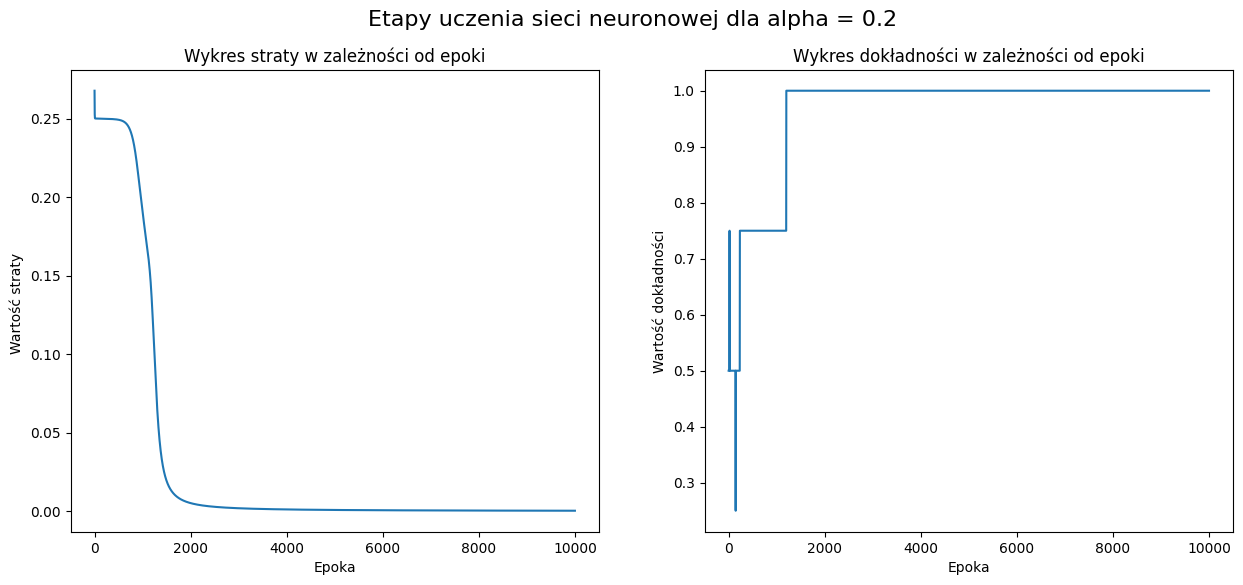

In [30]:
#trenowanie algorytmu
ACC = []
LOSS = []

epochs = 10000
for i in range(epochs):
    wh,wi,b_h,b_y,loss,accuracy = back_propagation(x,y,wh,wy,b_h,b_y,0.5)
    ACC.append(accuracy)
    LOSS.append(loss)
    
    if i%1000==0:
        print("Epoka: ",i, "Strata: ",loss, " Precyzja: ",accuracy)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].plot(LOSS)
axes[0].set_title('Wykres straty w zależności od epoki')
axes[0].set_ylabel('Wartość straty ')
axes[0].set_xlabel('Epoka')
axes[1].plot(ACC)
axes[1].set_title('Wykres dokładności w zależności od epoki')
axes[1].set_ylabel('Wartość dokładności')
axes[1].set_xlabel('Epoka')
plt.suptitle('Etapy uczenia sieci neuronowej dla alpha = 0.2', fontsize=16)
plt.show()


In [31]:
def predict(x,wh,wy,b_h,b_y):
    zh = np.dot(x,wh)
    zh += b_h
    ah = f_sigmoid(zh) 

    zy = np.dot(ah, wy)
    zy += b_y
    ay = f_sigmoid(zy)
    return ay, np.round(ay)
    
for i in range(4):
    ay, y_pred =predict(np.array([x[i]]),wh,wy,b_h,b_y)
    print("Przewidywana wartość dla ",x[i],": ",y_pred, "a dokladnie: ",ay)

Przewidywana wartość dla  [0 0] :  [[0.]] a dokladnie:  [[0.01955784]]
Przewidywana wartość dla  [0 1] :  [[1.]] a dokladnie:  [[0.9830968]]
Przewidywana wartość dla  [1 0] :  [[1.]] a dokladnie:  [[0.98314253]]
Przewidywana wartość dla  [1 1] :  [[0.]] a dokladnie:  [[0.01749036]]


### 6. Symulacyjne badanie wpływu wspołczynnika uczenia alpha na działanie sieci

In [32]:
epochs = 10000

Losses = {}
Accuracies = {}

for alpha in [0.01,0.05,0.1,0.5]:
    wh = np.random.uniform(size = (n_x,n_h)) # 2x2 macierz wag dla warstwy ukrytej
    wy = np.random.uniform(size = (n_h,n_y)) # 2x1 macierz wag dla warstwy wyjsciowej

    b_h = np.random.uniform(size = (1,n_h)) # 1x2 macierz biasow dla warstwy ukrytej
    b_y = np.random.uniform(size = (1,n_y)) # 1x1 macierz biasow dla warstwy wyjsciowej
    
    ACC = []
    LOSS = []
    
    for i in range(epochs):
        wh,wi,b_h,b_y,loss,accuracy = back_propagation(x,y,wh,wy,b_h,b_y,alpha)
        ACC.append(accuracy)
        LOSS.append(loss)
        
    Losses[alpha] = LOSS
    Accuracies[alpha] = ACC


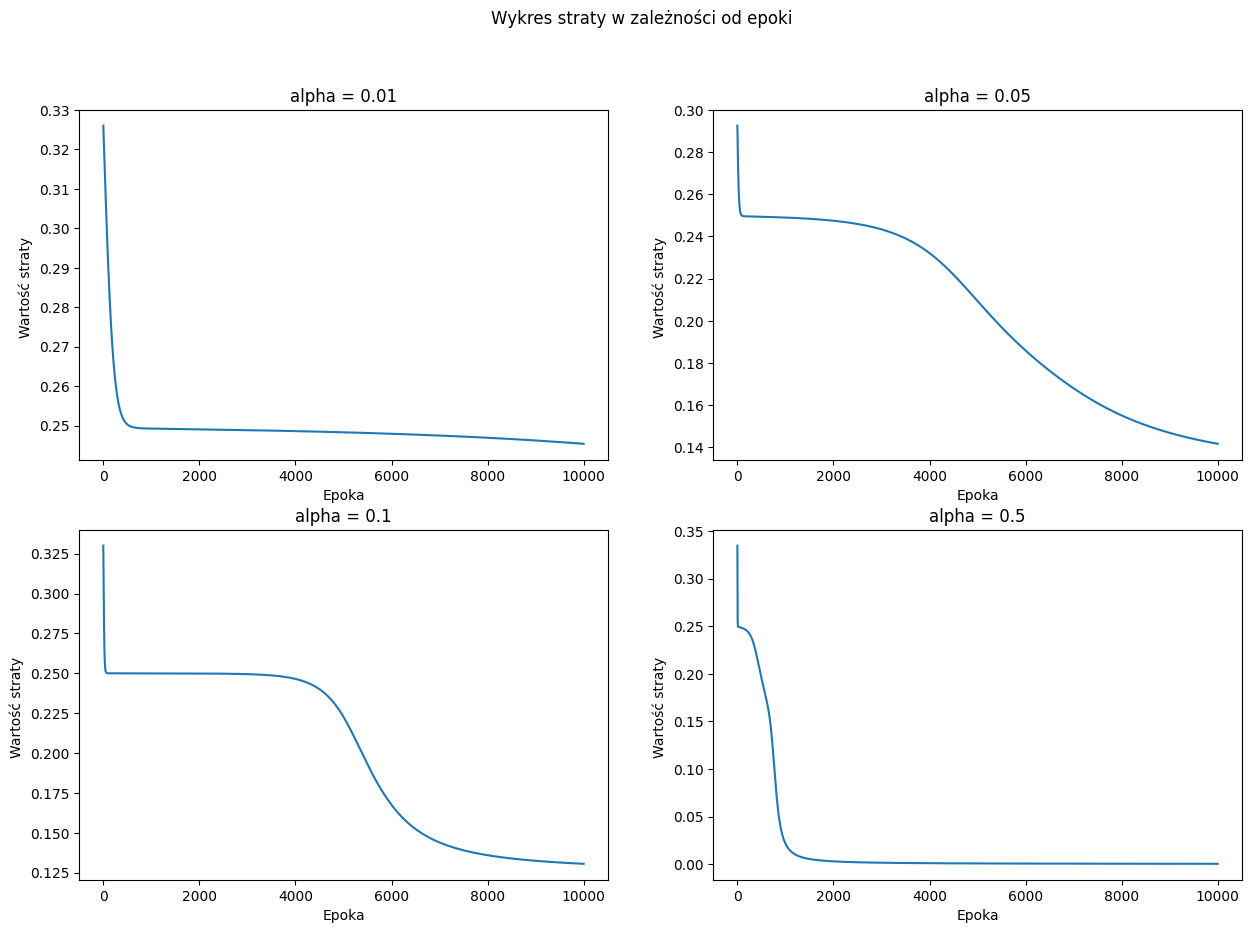

In [33]:
fig,ax = plt.subplots(2,2,figsize=(15,10))
ax[0,0].plot(Losses[0.01])
ax[0,0].set_title('alpha = 0.01')
ax[0,0].set_ylabel('Wartość straty ')
ax[0,0].set_xlabel('Epoka')
ax[0,1].plot(Losses[0.05])
ax[0,1].set_title('alpha = 0.05')
ax[0,1].set_ylabel('Wartość straty ')
ax[0,1].set_xlabel('Epoka')
ax[1,0].plot(Losses[0.1])
ax[1,0].set_title('alpha = 0.1')
ax[1,0].set_ylabel('Wartość straty ')
ax[1,0].set_xlabel('Epoka')
ax[1,1].plot(Losses[0.5])
ax[1,1].set_title('alpha = 0.5')
ax[1,1].set_ylabel('Wartość straty ')
ax[1,1].set_xlabel('Epoka')
plt.suptitle('Wykres straty w zależności od epoki')
plt.show()

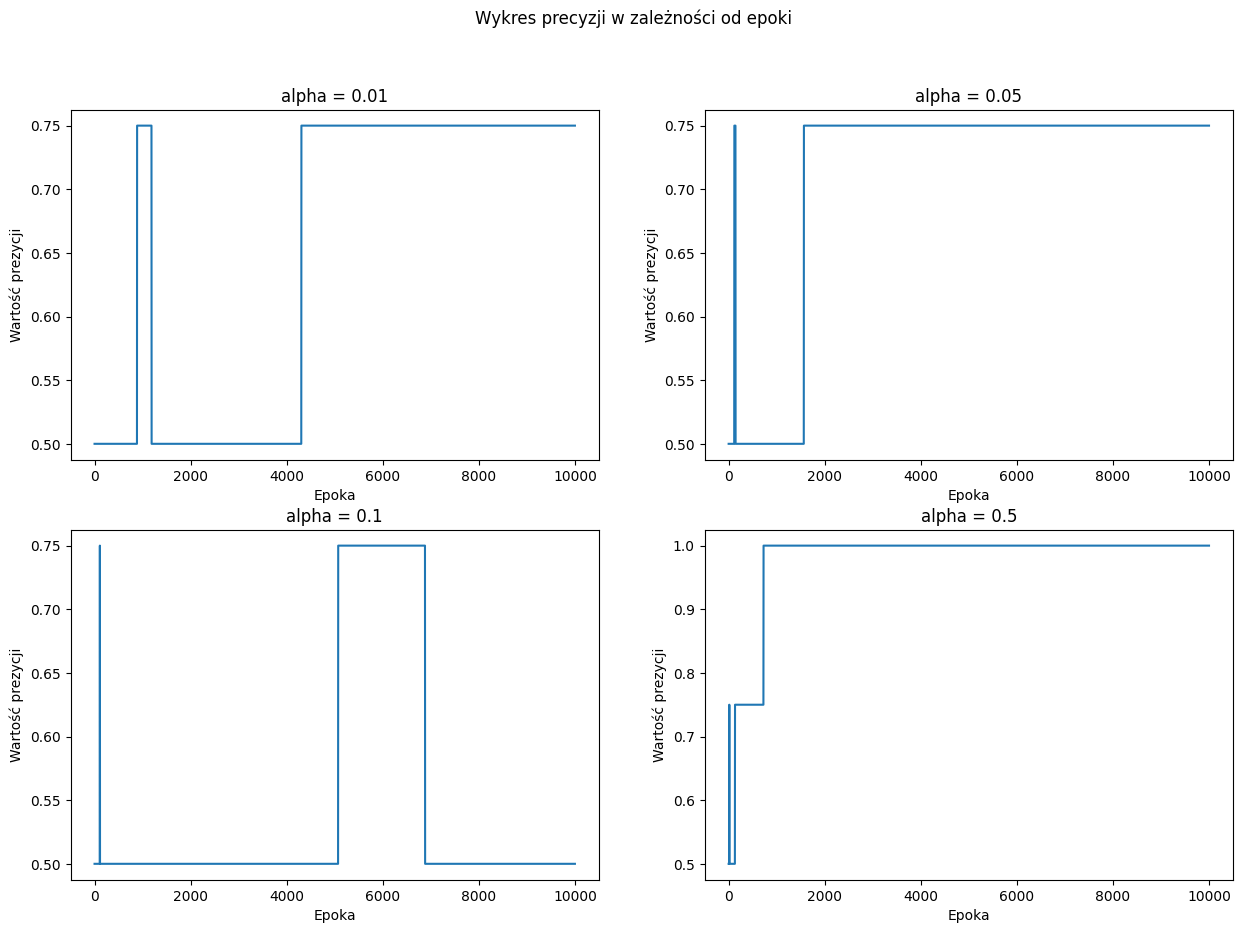

In [34]:
fig,ax = plt.subplots(2,2,figsize=(15,10))
ax[0,0].plot(Accuracies[0.01])
ax[0,0].set_title('alpha = 0.01')
ax[0,0].set_ylabel('Wartość prezycji')
ax[0,0].set_xlabel('Epoka')
ax[0,1].plot(Accuracies[0.05])
ax[0,1].set_title('alpha = 0.05')
ax[0,1].set_ylabel('Wartość prezycji')
ax[0,1].set_xlabel('Epoka')
ax[1,0].plot(Accuracies[0.1])
ax[1,0].set_title('alpha = 0.1')
ax[1,0].set_ylabel('Wartość prezycji')
ax[1,0].set_xlabel('Epoka')
ax[1,1].plot(Accuracies[0.5])
ax[1,1].set_title('alpha = 0.5')
ax[1,1].set_ylabel('Wartość prezycji')
ax[1,1].set_xlabel('Epoka')
plt.suptitle('Wykres precyzji w zależności od epoki')
plt.show()

### 5.Podsumowanaie i wnioski

Z powyższych wykresów widac, że dla sieci neuronowej realizującej funkcję XOR, wartość straty maleje najszybciej dla współczynnika uczenia równego 0.01 oraz 0.5. Jednak dla tych samych współczynników widać, że wykres precyzji sieci w przypadku wartości 0.01 osiąga zdecydowanie gorsze wartości (maksymalnie osiąga wartość 0.75 i to przy długim czasie uczenia) niż dla współczynnika 0.5, który po stosunkowo krótkim czasie w porównaniu do pozostałych współczynników wzrasta do 1 i utrzymuje się na tym poziomie. Oznacza to, że sieć najszybciej i najlepiej uczy się dla wspołczynnika uczenia 0.5.   

Na podstawie powyższych obserwacji można wysnuć wnioski:  
1. Współczynnik uczenia pełni istotną role w procesie uczenia sieci - wpływa on na jej szybkość. Ważne jest umiejętne dobranie współczynnika uczenia do konkretnej struktury sieci, ponieważ często zbyt duże lub małe wartości mogą dawać gorsze wyniki uczenia sieci neuronowej.
2. Dla zaproponowanej sieci o stosunkowo prostej strukturze, lepiej sprawdzą się współczynniki o większej wartości. Zbyt mała wartość współczynnika gorzej wpływa na proces uczenia (zmniejsza precyzje sieci).
3. Większa liczba epok wpływa na lepsze wyniki sieci neuronowej.  
4. Dobrana struktura sieci pozwala na realizacje problemu XOR.